# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [92]:
%%time

from __future__ import print_function, division

import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

numpy.random.seed(18)

%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

Wall time: 5.51 ms


In [93]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [94]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


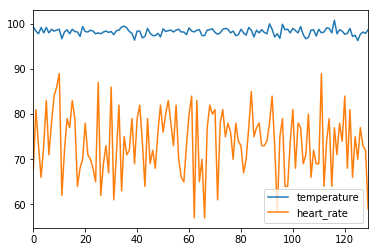

In [95]:
df.plot()

# > Where I Stopped <

Good Information: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-21.html

Khan Stop: https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-proportion/v/large-sample-proportion-hypothesis-testing

# Question #1

### Is the distribution of body temperatures normal?

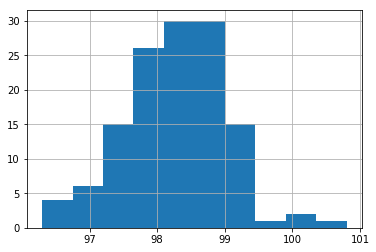

In [96]:
df['temperature'].hist()

The distribution of body temperatures is skewed to the left.

# Question #2

### Is the sample size large? <br>

In [97]:
len(df['temperature'])

130

### This is a small sample size of 130 temperatures.

### Are the observations independent?

I do not know whether the observations are independent.

# Question #3. <br>

### Is the true population mean really 98.6 degrees F?<br>

In [98]:
temp_mean = df['temperature'].mean()
temp_mean

98.24923076923078

The population mean is 98.25

In [99]:
temp_std = df['temperature'].std()
temp_std

0.7331831580389454

### Would you use a one-sample or two-sample test? Why?

I would use the one-sample test unless I am comparing to independent groups.

### In this situation, is it appropriate to use the tt or zz statistic?

A <i>t</i> distribution should be used on a sample size <u>smaller than 30</u>. However, in this case we have 130 observations. Therefore, we should use the <i>z</i> statistic.

In [73]:
np.random.seed(10)

sample_size = len(df['temperature'])
sample = np.random.choice(a= df['temperature'], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['temperature'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  
print(" ")
print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.95996398454
Confidence interval:
(98.139350274335499, 98.391418956433739)


### Now try using the other test. How is the result be different? Why?

In [90]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= df['temperature'], size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=sample_size-1)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("")
print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.06389856163

Confidence interval:
(98.189082976525171, 98.714917023474797)


# Question #4. 

### At what temperature should we consider someone's temperature to be "abnormal"? 

### Start by computing the margin of error and confidence interval.

In [91]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= sample_size-1,         # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(98.189082976525171, 98.714917023474797)

### Is there a significant difference between males and females in normal temperature?

In [76]:
# Splitting the dataset by gender for future testing.

temp_male = df[df.gender == 'M']['temperature']
temp_female = df[df.gender == 'F']['temperature']

In [86]:
print("Mean male temperature:")
print(temp_male.mean())

print("")

print("Mean female temperature:")
print(temp_female.mean())

Mean male temperature:
98.1046153846154

Mean female temperature:
98.39384615384613


### What test did you use and why?

### Write a story with your conclusion in the context of the original problem.

# Question #5.

### Is there a significant difference between males and females in normal temperature?

### What test did you use and why?

### Write a story with your conclusion in the context of the original problem.